In [2]:
import pandas as pd

In [4]:
teams = pd.read_csv("/content/teams.csv")

teams = teams[['team','country','year','athletes','age','prev_medals','medals']]

In [5]:
teams.dtypes

teams_numeric = teams.select_dtypes(include='number')
teams_numeric.corr()['medals']

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


# GRAPHS

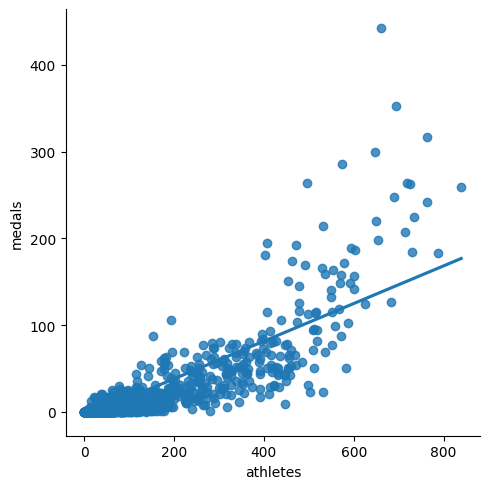

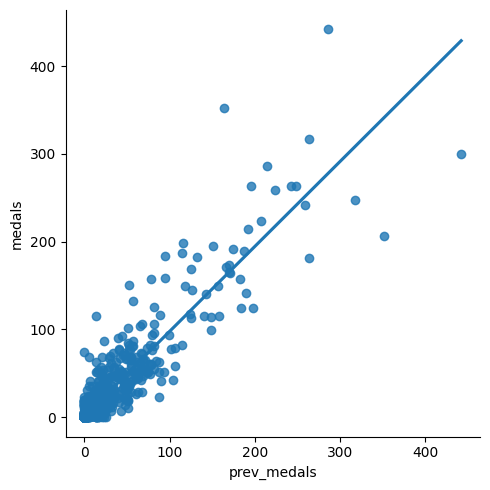

In [6]:
import seaborn as sns


sns.lmplot(data=teams , x = 'athletes',y = 'medals',ci=None)


sns.lmplot(data = teams , x ='prev_medals',y='medals',ci=None)

# Finding Na or Missing Values

In [128]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals


In [129]:
teams = teams.dropna()

train = teams [ teams['year'] < 2012].copy()

test = teams[teams['year'] >= 2012].copy()

train.shape

(1609, 7)

# Model Building


In [130]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


predictors = ['athletes','prev_medals']
actual = 'medals'


reg.fit(train[predictors],train["medals"])

LinearRegression()

predictions = reg.predict(test[predictors])
predictions



array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [131]:
test["predictions"] = predictions

In [132]:
test.loc[test["predictions"] < 0 , 'predictions'] = 0

test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


#Finding Mean Absolute Error

In [133]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['predictions'],test['medals'])
error

teams.describe()['medals']

test[test['team'] == "IND"]


errors = (test['medals'] - test['predictions']).abs()

errors_by_team = errors.groupby(test['team']).mean()

errors_by_team

,0
team,
AFG,0.500000
ALB,0.000000
ALG,1.535133
AND,0.000000
ANG,0.183782
...,...
VIE,1.164723
VIN,0.000000
YEM,0.000000


In [134]:
import numpy as np

medals_by_team = teams['medals'].groupby(test['team']).mean()
medals_by_team

error_ratio = errors_by_team / medals_by_team

error_ratio[~pd.isnull(error_ratio)]

error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

,0
team,
AFG,1.000000
ALG,1.023422
ARG,0.841636
ARM,0.433824
AUS,0.362901
...,...
UKR,0.946412
USA,0.128207
UZB,0.658187


<Axes: ylabel='Frequency'>

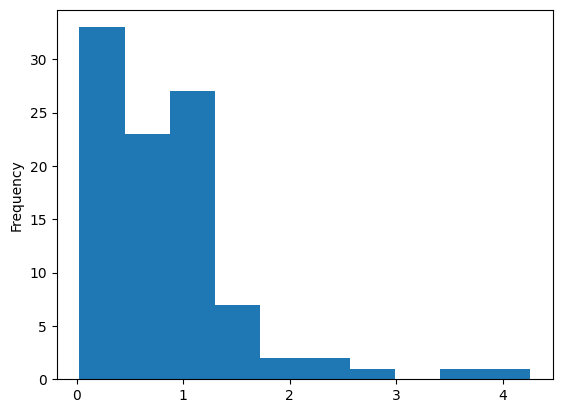

In [135]:
error_ratio.plot.hist()

# Improving the Model

##1.Finding outliers in the dataset


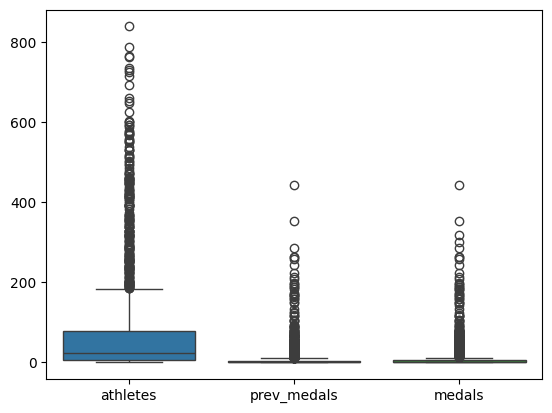

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [137]:
import matplotlib.pyplot as plt

sns.boxplot(data = train[['athletes','prev_medals','medals']])
plt.show()

test

##2.Removing Outliers



In [138]:
upper_limit = train['athletes'].quantile(0.95)
df_2 = train

df_2['athletes'] = np.where(train['athletes'] > upper_limit , upper_limit , train['athletes'])

upper_limit_2 = train['prev_medals'].quantile(0.95)
df_2['prev_medals'] = np.where(train['prev_medals'] > upper_limit_2 , upper_limit_2 , train['prev_medals'])


upper_limit_2 = train['medals'].quantile(0.95)
df_2['medals'] = np.where(train['medals'] > upper_limit_2 , upper_limit_2 , train['medals'])


,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


##3.New Model


In [140]:


# Log Transformations

df_2['log_athletes']=np.log1p(df_2['athletes'])
df_2['log_prev_medals'] = np.log1p(df_2['prev_medals'])
df_2['log_medals'] = np.log1p(df_2['medals'])

# interactions

df_2['prev_medals_per_athlete'] = df_2['prev_medals']/(df_2['athletes'] + 1)
df_2['athlete_squared'] = df_2['athletes'] ** 2
df_2['prev_medals_squared'] = df_2['prev_medals'] ** 2

#feature

features = ['log_athletes', 'log_prev_medals']

target = ['log_medals']

X = df_2[features]
y = df_2[target]

model = LinearRegression()

model.fit(X,y)



,team,country,year,athletes,age,prev_medals,medals,predictions,log_athletes,log_prev_medals,log_medals,predictions_model_2
6,AFG,Afghanistan,2012,6.0,24.8,1.0,1.0,0.000000,1.945910,0.693147,0.693147,1
7,AFG,Afghanistan,2016,3.0,24.7,1.0,0.0,0.000000,1.386294,0.693147,0.000000,0
24,ALB,Albania,2012,10.0,25.7,0.0,0.0,0.000000,2.397895,0.000000,0.000000,0
25,ALB,Albania,2016,6.0,23.7,0.0,0.0,0.000000,1.945910,0.000000,0.000000,0
37,ALG,Algeria,2012,39.0,24.8,2.0,1.0,2.155629,3.688879,1.098612,0.693147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3.0,19.3,0.0,0.0,0.000000,1.386294,0.000000,0.000000,0
2131,ZAM,Zambia,2012,7.0,22.6,0.0,0.0,0.000000,2.079442,0.000000,0.000000,0
2132,ZAM,Zambia,2016,7.0,24.1,0.0,0.0,0.000000,2.079442,0.000000,0.000000,0
2142,ZIM,Zimbabwe,2012,9.0,27.3,4.0,0.0,1.505767,2.302585,1.609438,0.000000,2


In [124]:

test_2 = test

#Modified test model =
def cap_outliers(df, column, upper_quantile=0.95):
    cap = df[column].quantile(upper_quantile)
    df[column] = np.where(df[column] > cap, cap, df[column])
    return df


for col in ['athletes', 'prev_medals', 'medals']:
    test_2 = cap_outliers(test_2, col)



test_2['log_athletes']=np.log1p(test_2['athletes'])
test_2['log_prev_medals'] = np.log1p(test_2['prev_medals'])
test_2['log_medals'] = np.log1p(test_2['medals'])




predictions_2 = model.predict(test_2[features])

model_exp = np.expm1(predictions_2)

rounded_pred = np.round(model_exp).astype(int)

test_2['predictions_model_2'] = rounded_pred

test_2


,team,country,year,athletes,age,prev_medals,medals,predictions,log_athletes,log_prev_medals,log_medals,predictions_model_2
6,AFG,Afghanistan,2012,6.0,24.8,1.0,1.0,0.000000,1.945910,0.693147,0.693147,1
7,AFG,Afghanistan,2016,3.0,24.7,1.0,0.0,0.000000,1.386294,0.693147,0.000000,0
24,ALB,Albania,2012,10.0,25.7,0.0,0.0,0.000000,2.397895,0.000000,0.000000,0
25,ALB,Albania,2016,6.0,23.7,0.0,0.0,0.000000,1.945910,0.000000,0.000000,0
37,ALG,Algeria,2012,39.0,24.8,2.0,1.0,2.155629,3.688879,1.098612,0.693147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3.0,19.3,0.0,0.0,0.000000,1.386294,0.000000,0.000000,0
2131,ZAM,Zambia,2012,7.0,22.6,0.0,0.0,0.000000,2.079442,0.000000,0.000000,0
2132,ZAM,Zambia,2016,7.0,24.1,0.0,0.0,0.000000,2.079442,0.000000,0.000000,0
2142,ZIM,Zimbabwe,2012,9.0,27.3,4.0,0.0,1.505767,2.302585,1.609438,0.000000,2


# Model Comparison


In [144]:
from sklearn.metrics import r2_score


print("In the original model")

print(f"The r^2 score :- { r2_score(test['medals'],test['predictions'])}")
print(f"The MSE score :- { mean_absolute_error(test['medals'],test['predictions'])}")



print("In the New model")

print(f"The r^2 score :- { r2_score(test['medals'],test_2['predictions_model_2'])}")
print(f"The MSE score :- { mean_absolute_error(test['medals'],test_2['predictions_model_2'])}")

In the original model
The r^2 score :- 0.9211365227299905
The MSE score :- 3.2971993416169867
In the New model
The r^2 score :- 0.5909154302603811
The MSE score :- 4.841975308641976
